Part 1: Implement logistic regression with Stochatic Gradient decent 使用SGD完成逻辑回归

Part 2: Implement logistic regression with SGD with momentum 使用带有动量的SGD完成逻辑回归

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
def plotClass(X,y,p):
    #plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    #plt.show()

(2, 200)
(1, 200)
(200, 2) (200, 1)


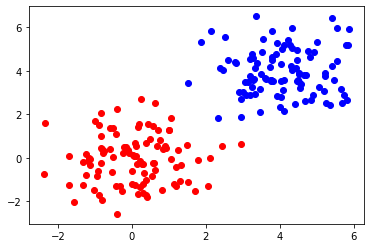

In [19]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

X = X.T
y = y.T
print(X.shape, y.shape)

In [20]:
print(X.shape, y.shape)

(200, 2) (200, 1)


In [21]:
#stochastic Gradient Decent
def get_z(X, w, b):
  return X @ w + b

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def get_loss(y, yhat):
  return np.sum(-y * np.log(yhat) - (1 - y) * np.log(1 - yhat), axis = 0)

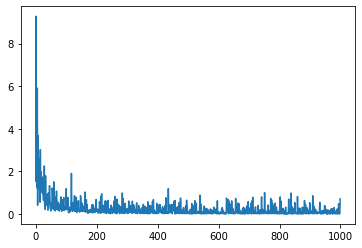

In [22]:
ni = X.shape[1]
no = y.shape[1]

w = np.random.randn(ni, no)
b = 0

lr = 1e-1
ls = []
for i in range(1000):
  # dJ / d yhat ---> dyhat
  # dJ / dz ---> dz
  # dJ / dw ---> dw
  # dJ / db ---> db

  #forward pass(给定输入找输出)
  temp = np.random.randint(0, 199, 10)
  X_1 = X[temp, :]
  y_1 = y[temp, :]

  Z = get_z(X_1, w, b)

  yhat = sigmoid(Z)

  loss = get_loss(y_1, yhat)

  ls.append(loss)

  #backward pass
  dz = yhat - y_1

  #dJ/dW = [dJ/dyhat * dyhat/z] * dz/dW
  #dJ/dW = [dz] * dz/dw
  #dz/dw = X.T

  dw = X_1.T @ dz

  db = np.sum(dz, axis = 0, keepdims = True)

  #weight update
  w -= lr*dw
  b -= lr*db

plt.plot(ls)

Z_1 = get_z(X, w, b)
yhat_1 = sigmoid(Z_1)


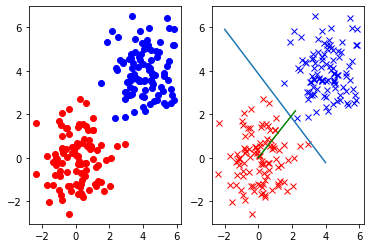

In [23]:
plt.figure()
plt.subplot(121)
plotClass(X.T,y.T,'o')
plt.subplot(122)
plotClass(X.T,yhat_1.T>0.5,'x')

#w1 * x1 + w2 * x2 + b = 0
x1 = np.linspace(-2, 4, 10)
x2 = (-b - w[0, 0]*x1) / w[1, 0]
plt.plot(x1, x2.squeeze())
plt.plot([0 , w[0, 0]], [0, w[1, 0]], 'g')

(2, 200)
(1, 200)
(200, 2) (200, 1)


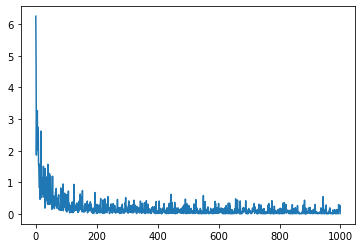

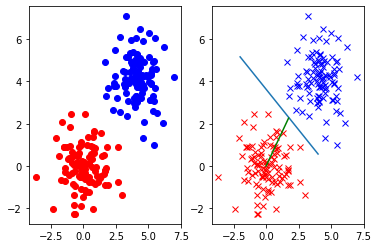

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
def plotClass(X,y,p):
    #plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    #plt.show()

num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
#plotClass(X,y,'o')
print(X.shape)
print(y.shape)

X = X.T
y = y.T
print(X.shape, y.shape)

#stochastic Gradient Decent
def get_z(X, w, b):
  return X @ w + b

def sigmoid(z):
  return 1/(1 + np.exp(-z))

def get_loss(y, yhat):
  return np.sum(-y * np.log(yhat) - (1 - y) * np.log(1 - yhat), axis = 0)

ni = X.shape[1]
no = y.shape[1]

w = np.random.randn(ni, no)
b = 0

lw = 0.5
vw = 0
vb = 0
lr = 1e-1
ls = []
for i in range(1000):
  # dJ / d yhat ---> dyhat
  # dJ / dz ---> dz
  # dJ / dw ---> dw
  # dJ / db ---> db

  #forward pass(给定输入找输出)
  temp = np.random.randint(0, 199, 10)
  X_1 = X[temp, :]
  y_1 = y[temp, :]

  Z = get_z(X_1, w, b)

  yhat = sigmoid(Z)

  loss = get_loss(y_1, yhat)

  ls.append(loss)

  #backward pass
  dz = yhat - y_1

  #dJ/dW = [dJ/dyhat * dyhat/z] * dz/dW
  #dJ/dW = [dz] * dz/dw
  #dz/dw = X.T

  dw = X_1.T @ dz

  db = np.sum(dz, axis = 0, keepdims = True)

  #weight update
  vw = lw * vw - (1 - lw) * dw
  vb = lw * vb - (1 - lw) * db
  w += lr*vw
  b += lr*vb

plt.plot(ls)

Z_1 = get_z(X, w, b)
yhat_1 = sigmoid(Z_1)


plt.figure()
plt.subplot(121)
plotClass(X.T,y.T,'o')
plt.subplot(122)
plotClass(X.T,yhat_1.T>0.5,'x')

#w1 * x1 + w2 * x2 + b = 0
x1 = np.linspace(-2, 4, 10)
x2 = (-b - w[0, 0]*x1) / w[1, 0]
plt.plot(x1, x2.squeeze())
plt.plot([0 , w[0, 0]], [0, w[1, 0]], 'g')